In [8]:
df = pd.read_csv("Downloads/stress_data.csv")


In [11]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             7 non-null      object 
 1   sleep_hours      7 non-null      float64
 2   work_hours       7 non-null      int64  
 3   social_time      7 non-null      int64  
 4   caffeine_intake  7 non-null      int64  
 5   steps            7 non-null      int64  
 6   screen_time      7 non-null      int64  
 7   water_intake     7 non-null      int64  
 8   mood             7 non-null      int64  
 9   weather          7 non-null      object 
 10  noise_level      7 non-null      int64  
 11  stress_level     7 non-null      int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 804.0+ bytes


,sleep_hours,work_hours,social_time,caffeine_intake,steps,screen_time,water_intake,mood,noise_level,stress_level
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,6.857143,7.571429,37.142857,2.285714,5142.857143,5.571429,3.000000,2.714286,4.000000,6.000000
std,1.107335,1.718249,30.256837,1.112697,2173.980330,1.718249,1.154701,1.112697,2.160247,2.160247
min,5.000000,5.000000,5.000000,1.000000,2000.000000,3.000000,2.000000,1.000000,1.000000,3.000000
25%,6.250000,6.500000,15.000000,1.500000,3750.000000,4.500000,2.000000,2.000000,2.500000,4.500000
50%,7.000000,8.000000,30.000000,2.000000,5000.000000,6.000000,3.000000,3.000000,4.000000,6.000000
75%,7.750000,8.500000,52.500000,3.000000,6750.000000,6.500000,3.500000,3.500000,5.500000,7.500000
max,8.000000,10.000000,90.000000,4.000000,8000.000000,8.000000,5.000000,4.000000,7.000000,9.000000


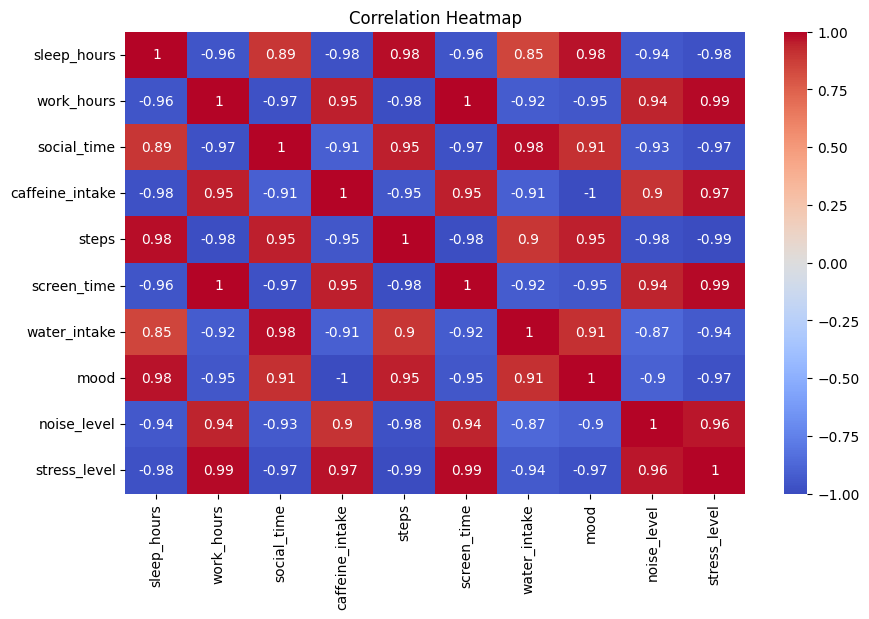

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


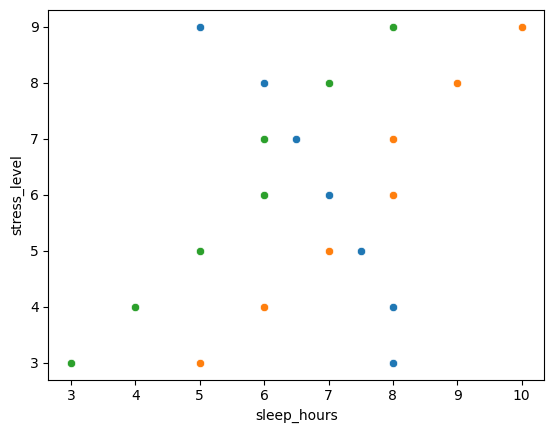

In [17]:
sns.scatterplot(data=df, x="sleep_hours", y="stress_level")
sns.scatterplot(data=df, x="work_hours", y="stress_level")
sns.scatterplot(data=df, x="screen_time", y="stress_level")
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Drop only if columns exist
drop_cols = [col for col in ["stress_level", "date"] if col in df.columns]
X = df.drop(drop_cols, axis=1)

# Encode non-numeric columns
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = df["stress_level"]  # Change this if the actual column name differs

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing complete.")


Preprocessing complete.


In [25]:
import pandas as pd

df = pd.read_csv("Downloads/stress_data.csv")
df.head()


,date,sleep_hours,work_hours,social_time,caffeine_intake,steps,screen_time,water_intake,mood,weather,noise_level,stress_level
0,2025-01-01,7.0,8,30,2,5000,6,3,3,Sunny,4,6
1,2025-01-02,6.0,9,10,3,3000,7,2,2,Rainy,6,8
2,2025-01-03,8.0,6,60,1,7000,4,4,4,Cloudy,3,4
3,2025-01-04,5.0,10,5,4,2000,8,2,1,Sunny,7,9
4,2025-01-05,7.5,7,45,2,6500,5,3,3,Cloudy,2,5


In [26]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             7 non-null      object 
 1   sleep_hours      7 non-null      float64
 2   work_hours       7 non-null      int64  
 3   social_time      7 non-null      int64  
 4   caffeine_intake  7 non-null      int64  
 5   steps            7 non-null      int64  
 6   screen_time      7 non-null      int64  
 7   water_intake     7 non-null      int64  
 8   mood             7 non-null      int64  
 9   weather          7 non-null      object 
 10  noise_level      7 non-null      int64  
 11  stress_level     7 non-null      int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 804.0+ bytes


,count,mean,std,min,25%,50%,75%,max
sleep_hours,7.0,6.857143,1.107335,5.0,6.25,7.0,7.75,8.0
work_hours,7.0,7.571429,1.718249,5.0,6.50,8.0,8.50,10.0
social_time,7.0,37.142857,30.256837,5.0,15.00,30.0,52.50,90.0
caffeine_intake,7.0,2.285714,1.112697,1.0,1.50,2.0,3.00,4.0
steps,7.0,5142.857143,2173.980330,2000.0,3750.00,5000.0,6750.00,8000.0
screen_time,7.0,5.571429,1.718249,3.0,4.50,6.0,6.50,8.0
water_intake,7.0,3.000000,1.154701,2.0,2.00,3.0,3.50,5.0
mood,7.0,2.714286,1.112697,1.0,2.00,3.0,3.50,4.0
noise_level,7.0,4.000000,2.160247,1.0,2.50,4.0,5.50,7.0
stress_level,7.0,6.000000,2.160247,3.0,4.50,6.0,7.50,9.0


In [27]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.sample(3)


Shape: (7, 12)

Columns: ['date', 'sleep_hours', 'work_hours', 'social_time', 'caffeine_intake', 'steps', 'screen_time', 'water_intake', 'mood', 'weather', 'noise_level', 'stress_level']


,date,sleep_hours,work_hours,social_time,caffeine_intake,steps,screen_time,water_intake,mood,weather,noise_level,stress_level
1,2025-01-02,6.0,9,10,3,3000,7,2,2,Rainy,6,8
2,2025-01-03,8.0,6,60,1,7000,4,4,4,Cloudy,3,4
6,2025-01-07,8.0,5,90,1,8000,3,5,4,Sunny,1,3


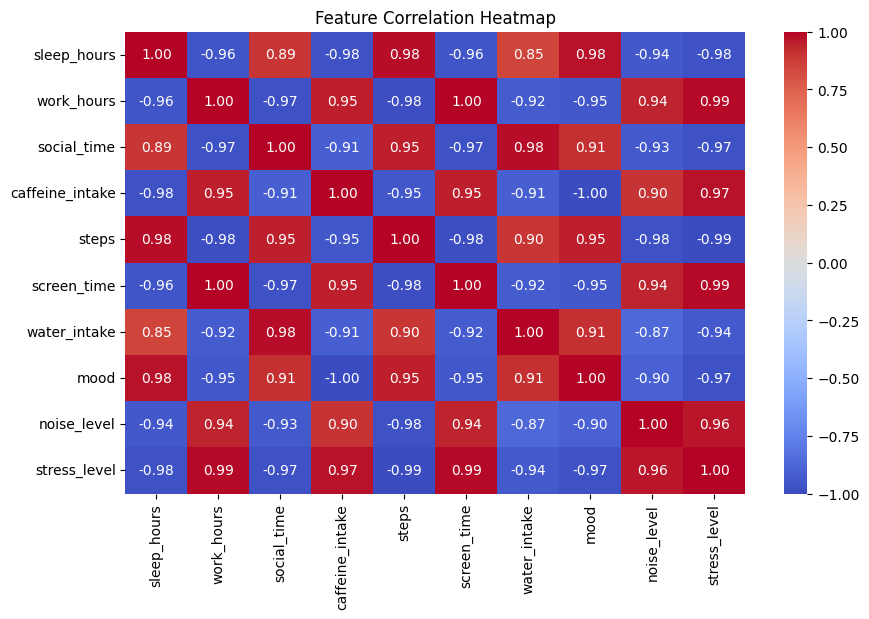

In [29]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot heatmap of correlations among numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


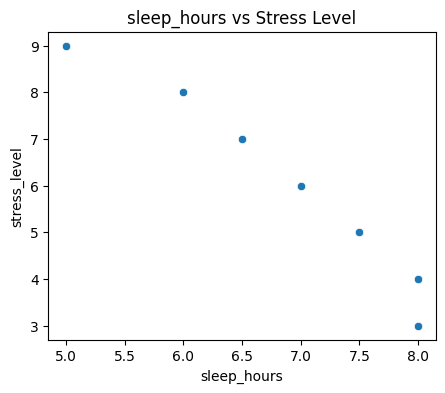

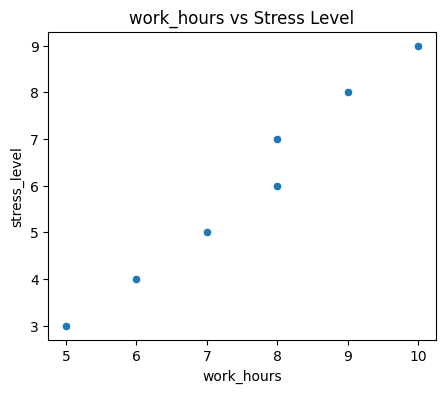

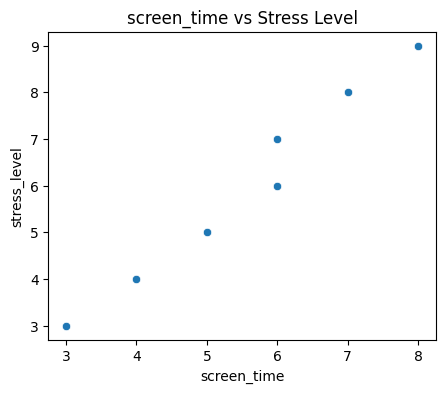

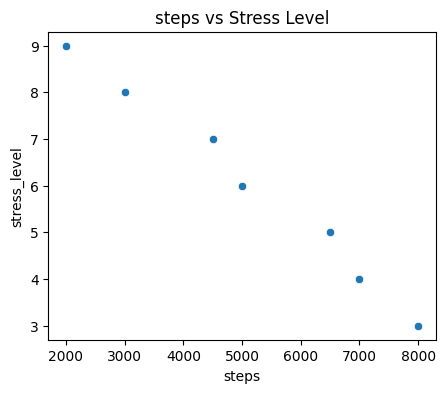

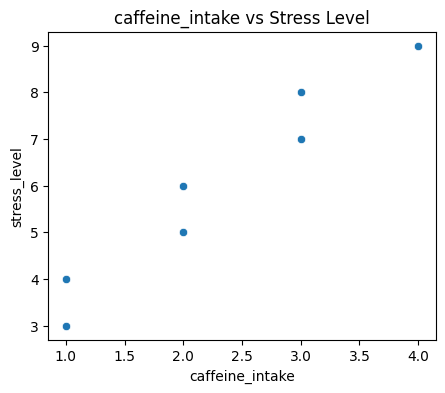

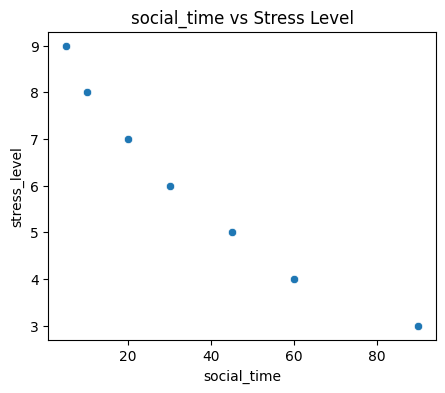

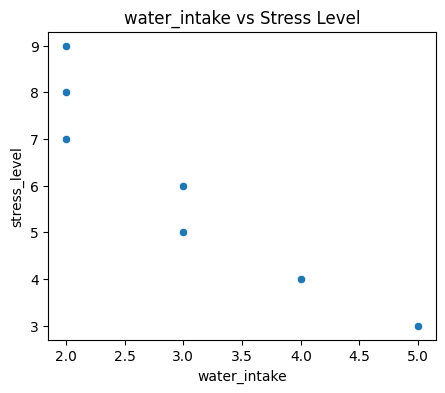

In [30]:
features = ["sleep_hours", "work_hours", "screen_time", "steps", "caffeine_intake", "social_time", "water_intake"]

for col in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(data=df, x=col, y="stress_level")
    plt.title(f"{col} vs Stress Level")
    plt.show()


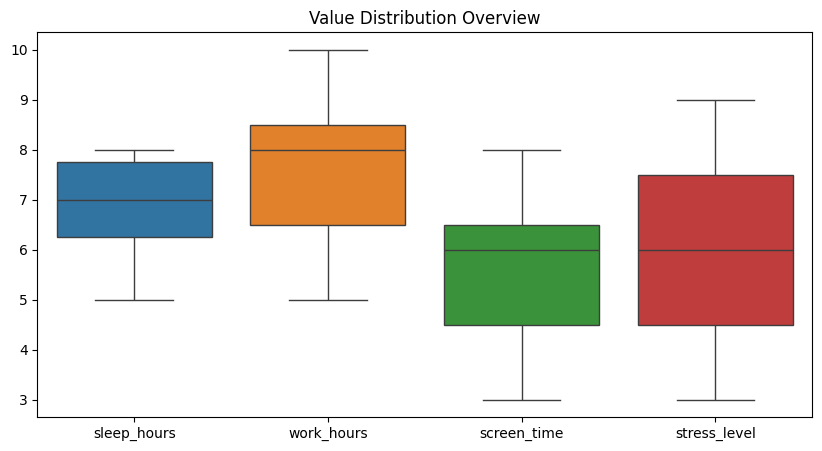

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["sleep_hours","work_hours","screen_time","stress_level"]])
plt.title("Value Distribution Overview")
plt.show()


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("📌 Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))


📌 Linear Regression Results:
MAE: 0.1366821123295514
R2 Score: 0.9773690818535787


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\n📌 Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))



📌 Random Forest Results:
MAE: 0.3450000000000002
R2 Score: 0.8613749999999998


In [2]:
from xgboost import XGBRegressor
print("✅ XGBoost is ready!")


✅ XGBoost is ready!


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ✅ Load the data (this will now work!)
df = pd.read_csv("stress_data.csv")

# ✅ Drop columns if they exist
drop_cols = [col for col in ["stress_level", "date"] if col in df.columns]
X = df.drop(drop_cols, axis=1)
y = df["stress_level"]

# ✅ Encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Create and train the model
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5)
xgb.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb.predict(X_test)

# Evaluate the model
print("\n📌 XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("R2 Score:", r2_score(y_test, xgb_pred))



📌 XGBoost Results:
MAE: 0.9989261627197266
R2 Score: 0.002145826816558838


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


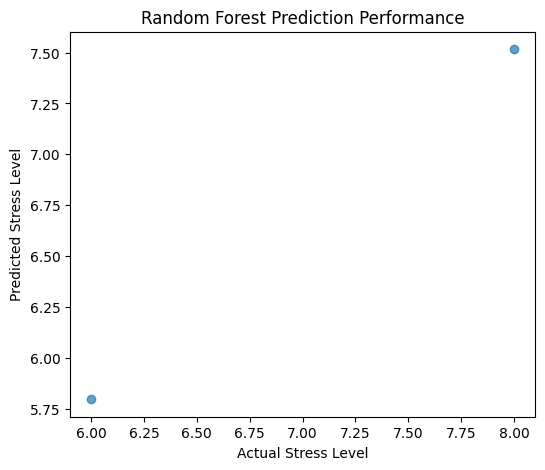

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Random Forest Prediction Performance")
plt.show()


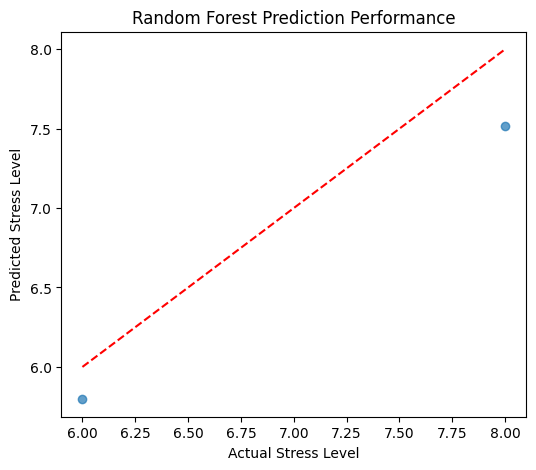

In [16]:
import numpy as np

plt.figure(figsize=(6,5))
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Random Forest Prediction Performance")
plt.show()


In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
lr_pred = lr.predict(X_test)


In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2  = r2_score(y_test, lr_pred)

print("📌 Linear Regression Performance")
print("MAE:", lr_mae)
print("R² Score:", lr_r2)


📌 Linear Regression Performance
MAE: 0.13668211232955052
R² Score: 0.9773690818535792


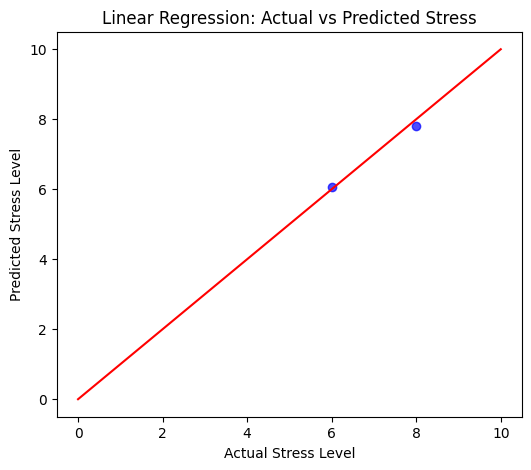

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, lr_pred, alpha=0.7, color="blue")
plt.plot([0,10],[0,10], color="red") # perfect prediction line
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Linear Regression: Actual vs Predicted Stress")
plt.show()


In [21]:
feature_names = X.columns


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("📌 Random Forest Performance")
print("MAE:", rf_mae)
print("R² Score:", rf_r2)


📌 Random Forest Performance
MAE: 0.3450000000000002
R² Score: 0.8613749999999998


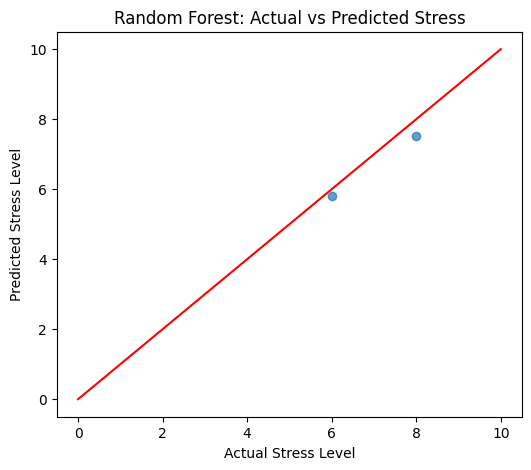

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.plot([0,10], [0,10], color="red")  # perfect line
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Random Forest: Actual vs Predicted Stress")
plt.show()


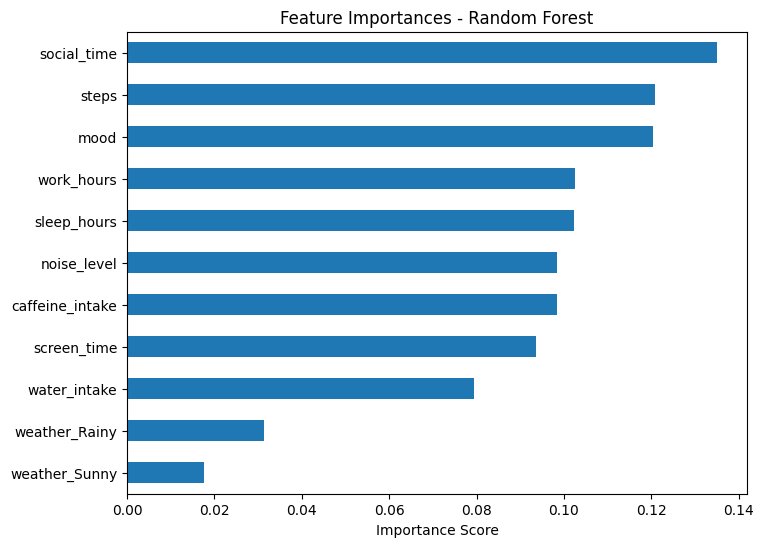

weather_Sunny      0.017728
weather_Rainy      0.031308
water_intake       0.079350
screen_time        0.093526
caffeine_intake    0.098486
noise_level        0.098506
sleep_hours        0.102321
work_hours         0.102435
mood               0.120410
steps              0.120804
social_time        0.135126
dtype: float64

In [24]:
import numpy as np
import pandas as pd

importances = rf.feature_importances_
importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(8,6))
importance_series.plot(kind="barh")
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.show()

importance_series


RANDOM FOREST RESULTS
MAE: 0.3450000000000002
R² Score: 0.8613749999999998

 LINEAR REGRESSION (for comparison)
MAE: 0.13668211232955052
R² Score: 0.9773690818535792


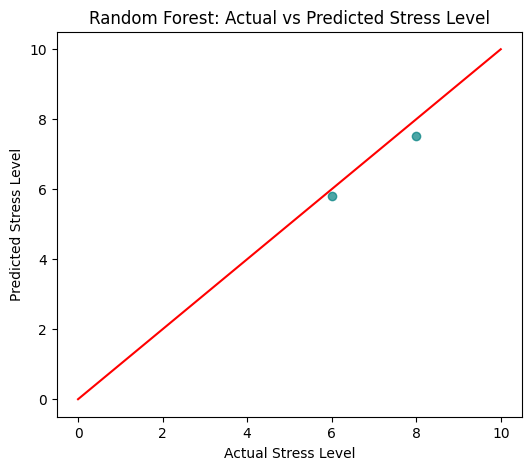

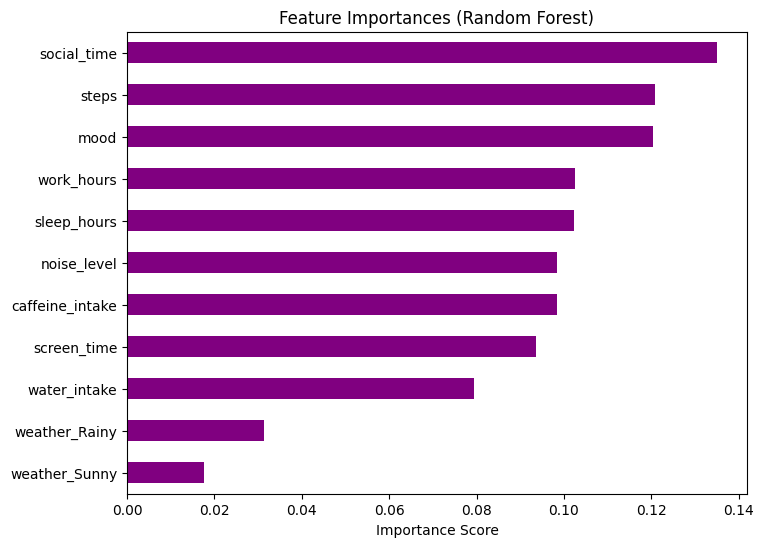

weather_Sunny      0.017728
weather_Rainy      0.031308
water_intake       0.079350
screen_time        0.093526
caffeine_intake    0.098486
noise_level        0.098506
sleep_hours        0.102321
work_hours         0.102435
mood               0.120410
steps              0.120804
social_time        0.135126
dtype: float64

In [25]:
# ============================
# 1. Train Random Forest
# ============================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


# ============================
# 2. Evaluation
# ============================

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2  = r2_score(y_test, rf_pred)

print("RANDOM FOREST RESULTS")
print("MAE:", rf_mae)
print("R² Score:", rf_r2)

print("\n LINEAR REGRESSION (for comparison)")
print("MAE:", lr_mae)
print("R² Score:", lr_r2)


# ============================
# 3. Actual vs Predicted Plot
# ============================

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, rf_pred, alpha=0.7, color="teal")
plt.plot([0,10], [0,10], color="red")   # perfect prediction line
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Random Forest: Actual vs Predicted Stress Level")
plt.show()


# ============================
# 4. Feature Importance Plot
# ============================

import pandas as pd
import numpy as np

feature_importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(8,6))
feature_importances.plot(kind="barh", color="purple")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

feature_importances


In [ ]:
### 🔍 Key Findings from Feature Importance
- Social interaction has the highest impact on stress levels.
- Mood and physical activity (steps) are strong predictors.
- Work hours and sleep hours show nearly equal influence.
- Caffeine, screen time, and noise moderately raise stress.
- Weather conditions have minimal effect compared to habits.
